### Decision Tree Model with Random Forest Classifier 

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
male_data=pd.read_csv('male_complete.csv')

In [3]:
male_data['Medal'] = male_data['Medal'].fillna('NA')

In [4]:
male_swim = male_data[male_data['Sport'] == 'Archery']

In [5]:
male_swim['Sport'].describe

<bound method NDFrame.describe of 15111    Archery
15112    Archery
15113    Archery
15114    Archery
15115    Archery
          ...   
15621    Archery
15622    Archery
15623    Archery
15624    Archery
15625    Archery
Name: Sport, Length: 515, dtype: object>

In [6]:
male_swim['Medal'].describe

<bound method NDFrame.describe of 15111    NA
15112    NA
15113    NA
15114    NA
15115    NA
         ..
15621    NA
15622    NA
15623    NA
15624    NA
15625    NA
Name: Medal, Length: 515, dtype: object>

In [7]:
male_swim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515 entries, 15111 to 15625
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      515 non-null    int64  
 1   Unnamed: 0_x    515 non-null    int64  
 2   ID              515 non-null    int64  
 3   Name            515 non-null    object 
 4   Sex             515 non-null    object 
 5   Age             515 non-null    float64
 6   Height          515 non-null    float64
 7   Weight          515 non-null    float64
 8   NOC             515 non-null    object 
 9   Games           515 non-null    object 
 10  Year            515 non-null    int64  
 11  Season          515 non-null    object 
 12  City            515 non-null    object 
 13  Sport           515 non-null    object 
 14  Event           515 non-null    object 
 15  Medal           515 non-null    object 
 16  Team            515 non-null    object 
 17  Unnamed: 0_y    515 non-null 

In [8]:
# Extract Response and Predictors
y = pd.DataFrame(male_swim["Medal"]).astype('category')
X = pd.DataFrame(male_swim[["Age", "Weight", "Height","GDP","Population","GDP Per Capita"]])

In [9]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (386, 1) (386, 6)
Test Set  : (129, 1) (129, 6)


In [10]:
#"Age", "Weight", "Height","GDP","Population","GDP Per Capita"

### Decision Tree Model accounting for class imbalance (SMOTE) + GraphViz visualisation

In [11]:
train_data= pd.concat([X_train, y_train.reindex(X_train.index)], axis=1)
train_data

,Age,Weight,Height,GDP,Population,GDP Per Capita,Medal
15112,24.0,70.0,176.0,1.660000e+12,142742350.0,11629.344760,NA
15523,18.0,60.0,183.0,1.950000e+12,82211508.0,23719.307034,NA
15456,29.0,84.0,177.0,3.820000e+11,8993531.0,42474.974512,NA
15549,24.0,75.0,176.0,1.040000e+11,4087500.0,25443.425076,NA
15111,24.0,70.0,176.0,1.660000e+12,142742350.0,11629.344760,NA
...,...,...,...,...,...,...,...
15324,52.0,98.0,191.0,1.470000e+13,304093966.0,48340.321228,NA
15163,27.0,76.0,177.0,1.340000e+12,46773055.0,28648.973218,NA
15313,44.0,73.0,175.0,1.118346e+10,3027398.0,3694.082552,NA
15333,21.0,82.0,180.0,5.430000e+08,23610200.0,22.998535,NA


In [12]:
NA_train_swim = train_data[train_data['Medal'] == 'NA']

Number of Medal Types : 4
NA        452
Silver     23
Bronze     20
Gold       20
Name: Medal, dtype: int64


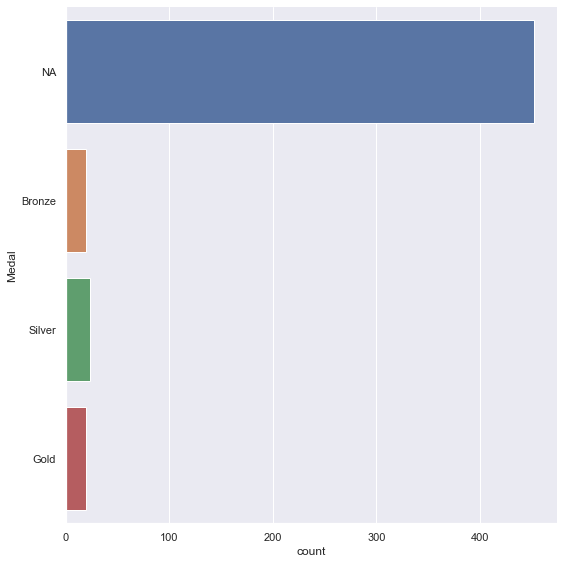

In [13]:
# Primary Types in the Dataset
print("Number of Medal Types :", len(male_swim["Medal"].unique()))

# Pokemons of each Primary Type
print(male_swim["Medal"].value_counts())
sb.catplot(y = "Medal", data = male_swim, kind = "count", height = 8)

In [14]:
#train_data['Medal']=train_data['Medal'].replace('NA',0)
#train_data['Medal']=train_data['Medal'].replace('Gold',1)
#train_data['Medal']=train_data['Medal'].replace('Silver',1)
#train_data['Medal']=train_data['Medal'].replace('Bronze',1)
#train_data.head(20)
print(X_train.shape, y_train.shape)

(386, 6) (386, 1)


In [15]:
#Importing SMOTE
from imblearn.over_sampling import SMOTE
#Oversampling the data
smote = SMOTE()
X, y = smote.fit_resample(X_train, y_train)

print(X.shape, y.shape)

(1336, 6) (1336, 1)


In [16]:
SMOTE_sample= pd.concat([X, y.reindex(X.index)], axis=1)
SMOTE_sample

,Age,Weight,Height,GDP,Population,GDP Per Capita,Medal
0,24.000000,70.000000,176.000000,1.660000e+12,1.427424e+08,11629.344760,NA
1,18.000000,60.000000,183.000000,1.950000e+12,8.221151e+07,23719.307034,NA
2,29.000000,84.000000,177.000000,3.820000e+11,8.993531e+06,42474.974512,NA
3,24.000000,75.000000,176.000000,1.040000e+11,4.087500e+06,25443.425076,NA
4,24.000000,70.000000,176.000000,1.660000e+12,1.427424e+08,11629.344760,NA
...,...,...,...,...,...,...,...
1331,31.062251,84.658639,173.664660,9.282150e+11,4.776248e+07,18779.509991,Silver
1332,19.756025,74.054969,177.298944,3.470000e+11,2.257022e+07,15374.238200,Silver
1333,38.715095,71.403219,172.016093,5.556546e+12,1.485135e+08,37562.328355,Silver
1334,23.485522,72.285074,183.799552,1.172339e+13,2.891876e+08,40115.195350,Silver


In [17]:
X_test

,Age,Weight,Height,GDP,Population,GDP Per Capita
15279,27.0,80.000000,177.000000,2.840000e+11,5313399.0,53449.778569
15596,26.0,73.000000,180.000000,1.620000e+13,313998379.0,51592.623031
15624,38.0,72.000000,187.000000,1.829199e+10,14883626.0,1229.000958
15519,31.0,80.000000,175.000000,3.056500e+10,11150736.0,2741.074670
15362,62.0,77.230769,179.846154,2.720147e+08,185063.0,1469.849149
...,...,...,...,...,...,...
15541,24.0,75.000000,178.000000,2.600000e+11,146596557.0,1773.575078
15286,24.0,74.000000,175.000000,2.380000e+11,10251250.0,23216.680893
15228,28.0,58.000000,170.000000,1.370000e+12,60912498.0,22491.279212
15207,23.0,86.000000,181.000000,1.620000e+13,313998379.0,51592.623031


Number of Medal Types : 4
Bronze    334
Gold      334
NA        334
Silver    334
Name: Medal, dtype: int64


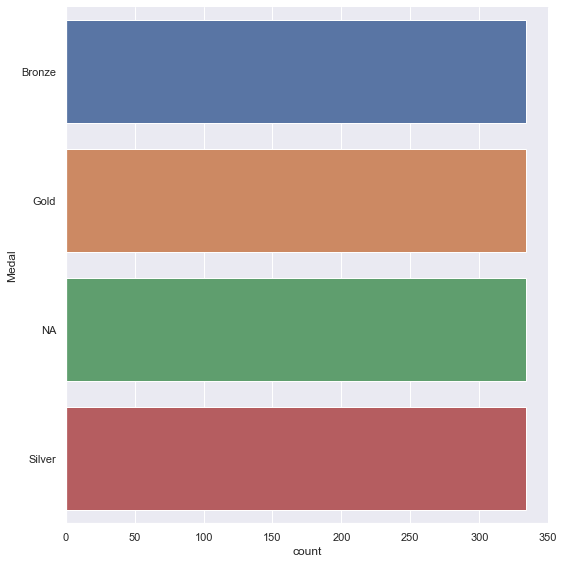

In [18]:
# Primary Types in the Dataset
print("Number of Medal Types :", len(SMOTE_sample["Medal"].unique()))

# Pokemons of each Primary Type
print(SMOTE_sample["Medal"].value_counts())
sb.catplot(y = "Medal", data = SMOTE_sample, kind = "count", height = 8)

Train Set : (1002, 1) (1002, 6)
Test Set  : (334, 1) (334, 6)
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9770459081836327

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9011976047904192



<AxesSubplot:>

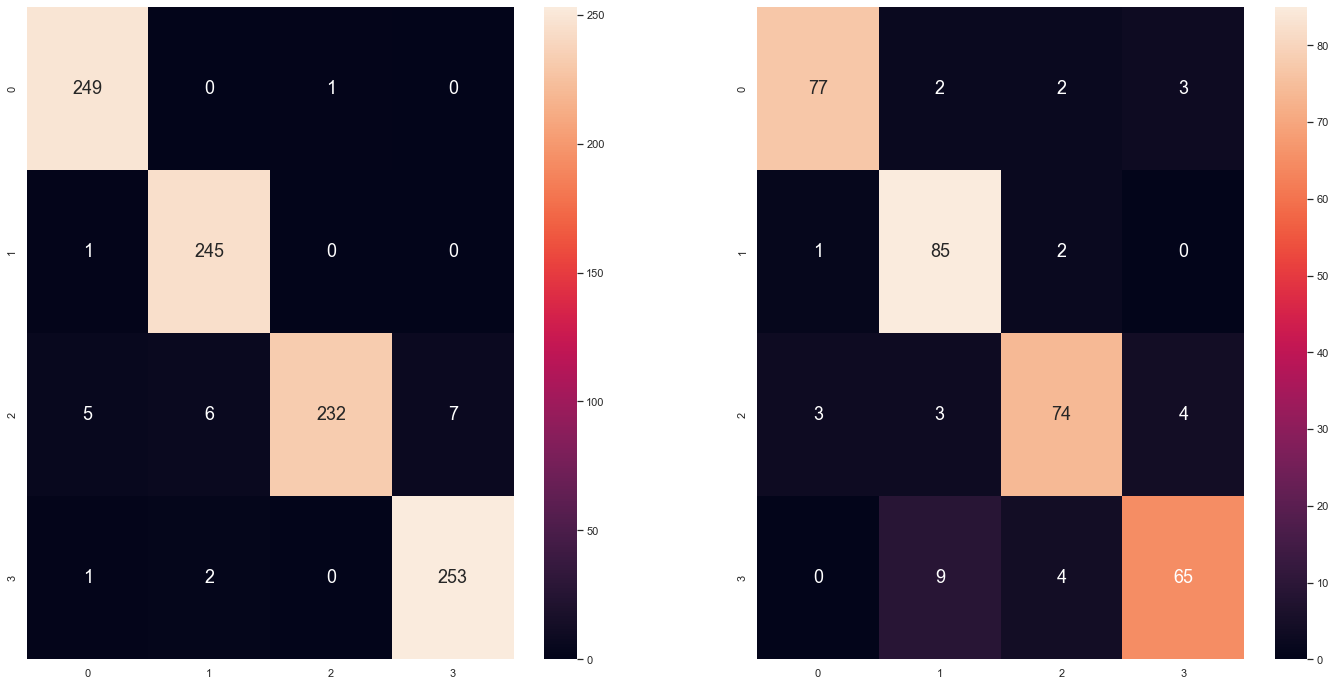

In [19]:
# Extract Response and Predictors
y_balanced = pd.DataFrame(SMOTE_sample["Medal"]).astype('category')
x_balanced = pd.DataFrame(SMOTE_sample[["Age", "Weight", "Height","GDP","Population","GDP Per Capita"]])

# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X1_train, X1_test, Y_train, Y_test = train_test_split(x_balanced, y_balanced, test_size = 0.25)

# Check the sample sizes
print("Train Set :", Y_train.shape, X1_train.shape)
print("Test Set  :", Y_test.shape, X1_test.shape)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Random Forest using Train Data
rforest = RandomForestClassifier(n_estimators = 100, max_depth = 10)  # create the object
rforest.fit(X1_train, Y_train.values.ravel())                         # train the model

# Predict Response corresponding to Predictors
Y_train_pred = rforest.predict(X1_train)
Y_test_pred = rforest.predict(X1_test)


#GOODNESS OF FIT

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rforest.score(X1_train, Y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rforest.score(X1_test, Y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(24, 12))
sb.heatmap(confusion_matrix(Y_train, Y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(Y_test, Y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Horizontal=actual, vertical=predict

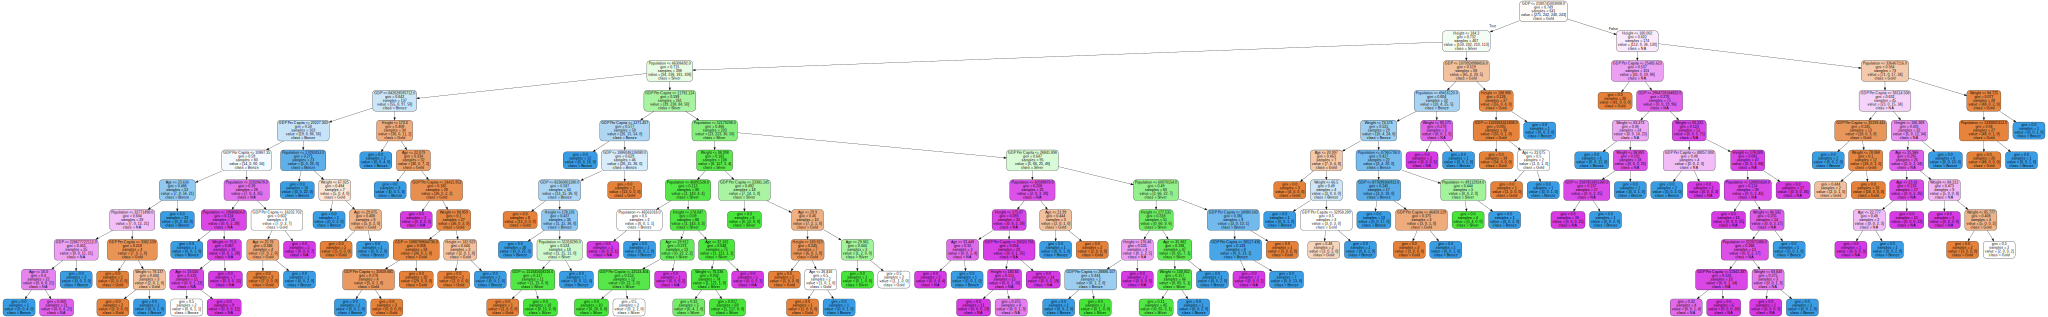

In [20]:
estimator = rforest.estimators_[5]

import graphviz

from sklearn import tree
feature_names = ["Age", "Weight", "Height","GDP","Population","GDP Per Capita"]
dot_data = tree.export_graphviz(estimator, out_file=None, filled=True, rounded = True, feature_names=["Age", "Weight", "Height","GDP","Population","GDP Per Capita"], class_names=['Gold', 'Silver', 'Bronze','NA'])
graph = graphviz.Source(dot_data)
graph

In [21]:
#graph.render("Tree_new")

### Predictions

In [22]:
y_test_pred = rforest.predict(X_test)
print("Classification Accuracy \t:", rforest.score(X_test, y_test))

Classification Accuracy 	: 0.7596899224806202


<AxesSubplot:>

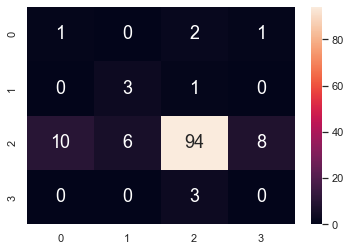

In [23]:
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})